In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import tree

import xgboost as xgb
from xgboost import plot_importance

from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'xgboost'

In [5]:
df=pd.read_csv('/Users/desgi/Desktop/extra ds projects from kaggle/Predictions/AI:ML Salaries/salaries.csv', encoding= 'unicode_escape', parse_dates=[0])

In [6]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022-01-01,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022-01-01,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022-01-01,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022-01-01,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022-01-01,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           1332 non-null   datetime64[ns]
 1   experience_level    1332 non-null   object        
 2   employment_type     1332 non-null   object        
 3   job_title           1332 non-null   object        
 4   salary              1332 non-null   int64         
 5   salary_currency     1332 non-null   object        
 6   salary_in_usd       1332 non-null   int64         
 7   employee_residence  1332 non-null   object        
 8   remote_ratio        1332 non-null   int64         
 9   company_location    1332 non-null   object        
 10  company_size        1332 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 114.6+ KB


In [13]:
df=df.astype({'salary': 'float', 'salary_in_usd': 'float', 'remote_ratio': 'float'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           1332 non-null   datetime64[ns]
 1   experience_level    1332 non-null   object        
 2   employment_type     1332 non-null   object        
 3   job_title           1332 non-null   object        
 4   salary              1332 non-null   float64       
 5   salary_currency     1332 non-null   object        
 6   salary_in_usd       1332 non-null   float64       
 7   employee_residence  1332 non-null   object        
 8   remote_ratio        1332 non-null   float64       
 9   company_location    1332 non-null   object        
 10  company_size        1332 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 114.6+ KB


In [18]:
df.rename(columns={'work_year' : 'work year', 'experience_level':'experience', 'employment_type': 'employment type', 'job_title':'job title', 'salary':'salary','salary_currency':'salary currency', 'salary_in_usd':'salary usd', 'employee_residence': 'residence', 'remote_ratio':'remote ratio', 'company_location': 'company location', 'company_size':'company size'})

,work year,experience,employment type,job title,salary,salary currency,salary usd,residence,remote ratio,company location,company size
0,2022-01-01,MI,FT,Machine Learning Engineer,130000.0,USD,130000.0,US,0.0,US,M
1,2022-01-01,MI,FT,Machine Learning Engineer,90000.0,USD,90000.0,US,0.0,US,M
2,2022-01-01,MI,FT,Data Scientist,120000.0,USD,120000.0,US,100.0,US,M
3,2022-01-01,MI,FT,Data Scientist,100000.0,USD,100000.0,US,100.0,US,M
4,2022-01-01,MI,FT,Data Scientist,85000.0,USD,85000.0,US,100.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1327,2020-01-01,SE,FT,Data Scientist,412000.0,USD,412000.0,US,100.0,US,L
1328,2021-01-01,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100.0,US,L
1329,2020-01-01,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100.0,US,S
1330,2020-01-01,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100.0,US,L


In [19]:
df.nunique().sort_values(ascending=True)

work_year               3
remote_ratio            3
company_size            3
experience_level        4
employment_type         4
salary_currency        18
company_location       59
job_title              64
employee_residence     64
salary                437
salary_in_usd         574
dtype: int64

In [20]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

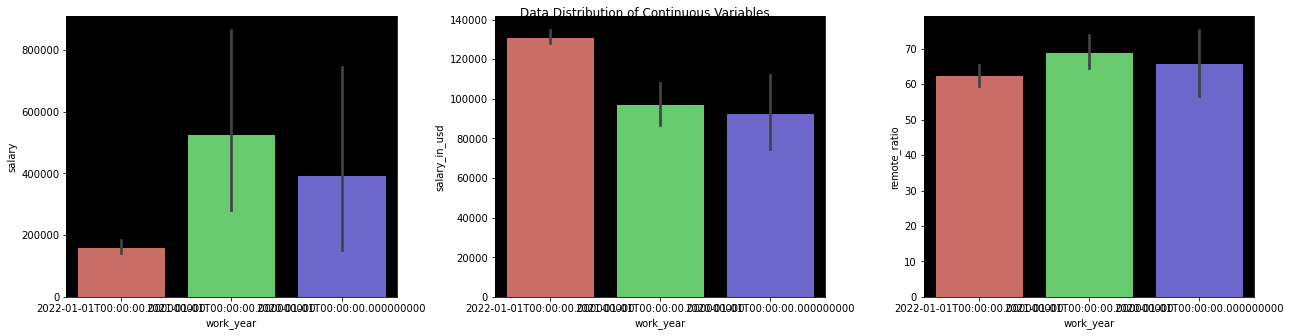

In [33]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(4,3,i+1)
    sns.barplot(data=df,x='work_year', y=col, ax=ax, edgecolor='black', palette='hls')
    plt.suptitle('Data Distribution of Continuous Variables')
    plt.tight_layout()

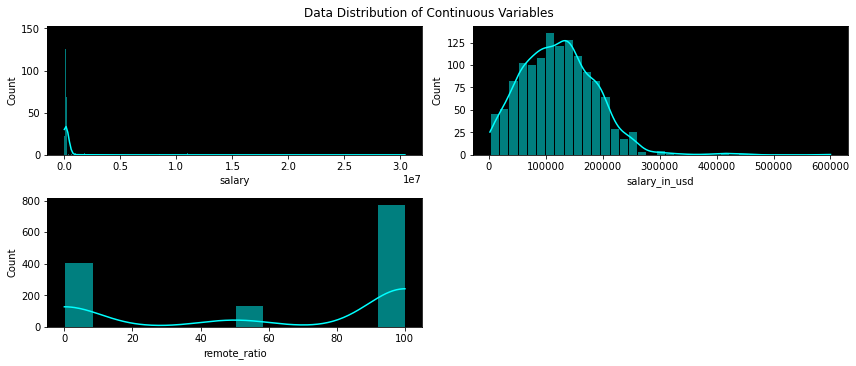

In [37]:
plt.figure(figsize=(12,12))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(5,2,i+1)
    sns.histplot(data=df,x=col, ax=ax, color='cyan', kde=True)
    plt.suptitle('Data Distribution of Continuous Variables')
    plt.tight_layout()

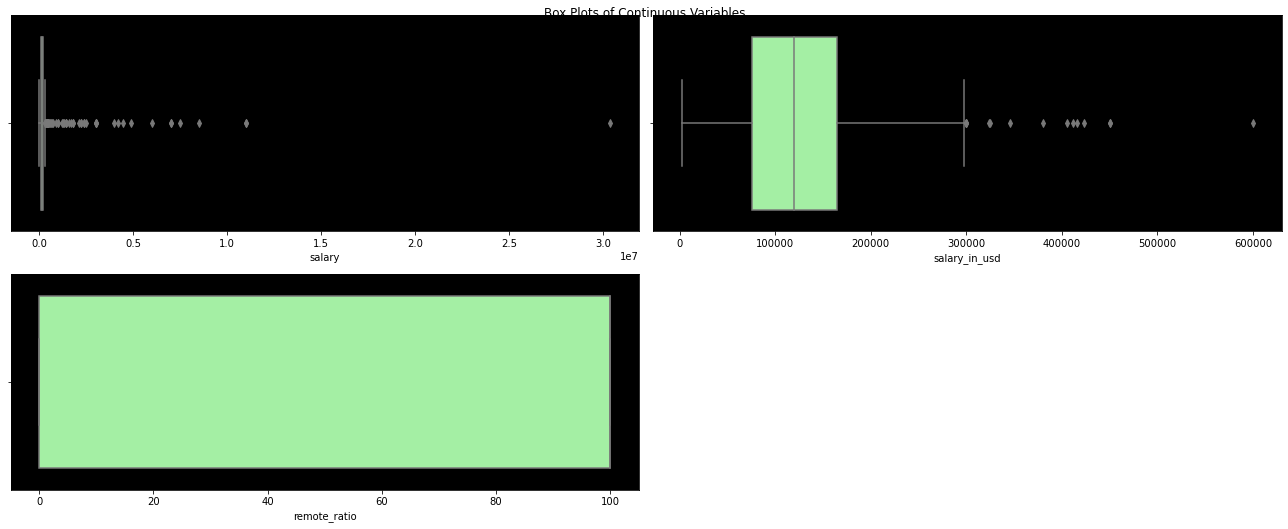

In [39]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(5,2,i+1)
    sns.boxplot(data=df, x=col, ax=ax, color='palegreen')
    plt.suptitle('Box Plots of Continuous Variables')
    plt.tight_layout()

In [43]:
#selectinh floar variables
var=list(df.select_dtypes(include=['float64']).columns)

In [46]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method ='yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

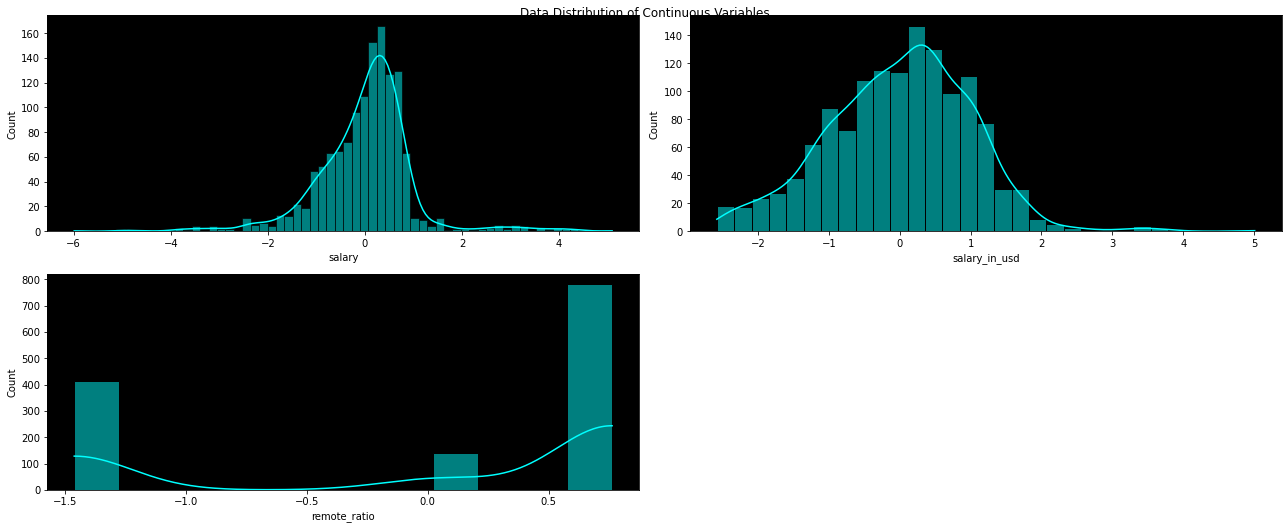

In [47]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(5,2,i+1)
    sns.histplot(data=df,x=col, ax=ax, color='cyan',kde=True)
    plt.suptitle('Data Distribution of Continuous Variables')
    plt.tight_layout()

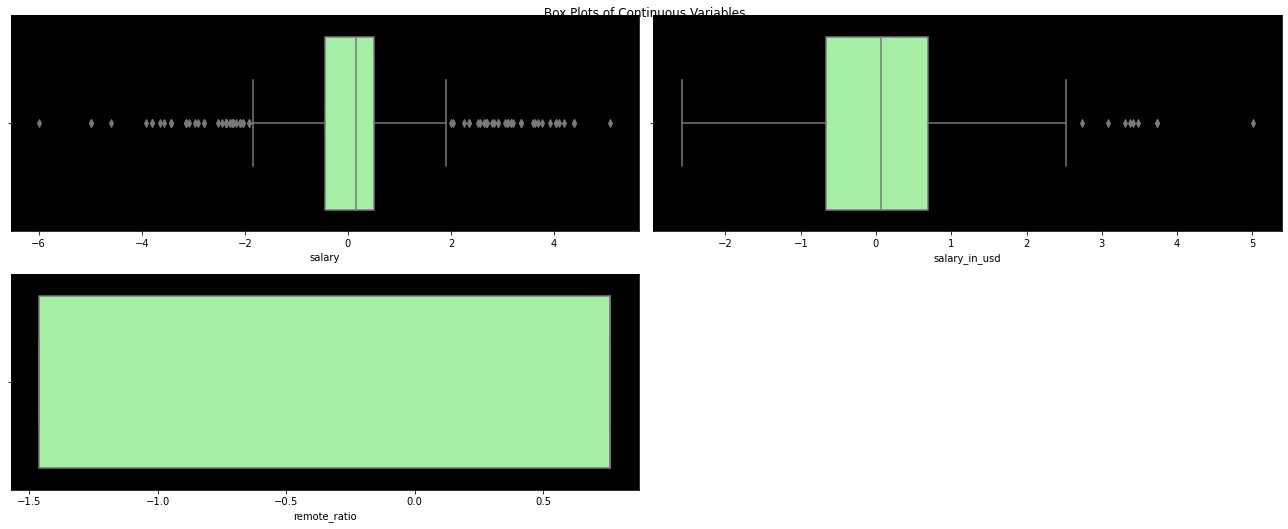

In [48]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(5,2,i+1)
    sns.boxplot(data=df, x=col, ax=ax, color='palegreen')
    plt.suptitle('Box Plots of Continuous Variables')
    plt.tight_layout()

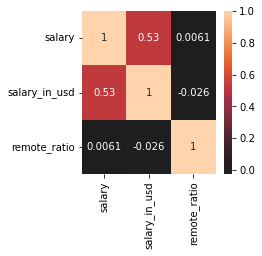

In [51]:
plt.figure(figsize=(3,3))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center=0)
plt.show()

In [95]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [93]:
#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculating_vif(X):
    vif = pd.DataFrame()
    vif['variables']= X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    return(vif)

In [103]:
calculating_vif(X.select_dtypes(include=['float']))

,variables,VIF
0,salary,1.392859
1,salary_in_usd,1.393748
2,remote_ratio,1.001230


In [106]:
categorical_features=[col for col in df.columns if df[col].dtype=='O']
categorical_features

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [107]:
categorical_data = df[categorical_features]

In [113]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is experience_level and number of categories are 4
The feature is employment_type and number of categories are 4
The feature is job_title and number of categories are 64
The feature is salary_currency and number of categories are 18
The feature is employee_residence and number of categories are 64
The feature is company_location and number of categories are 59
The feature is company_size and number of categories are 3


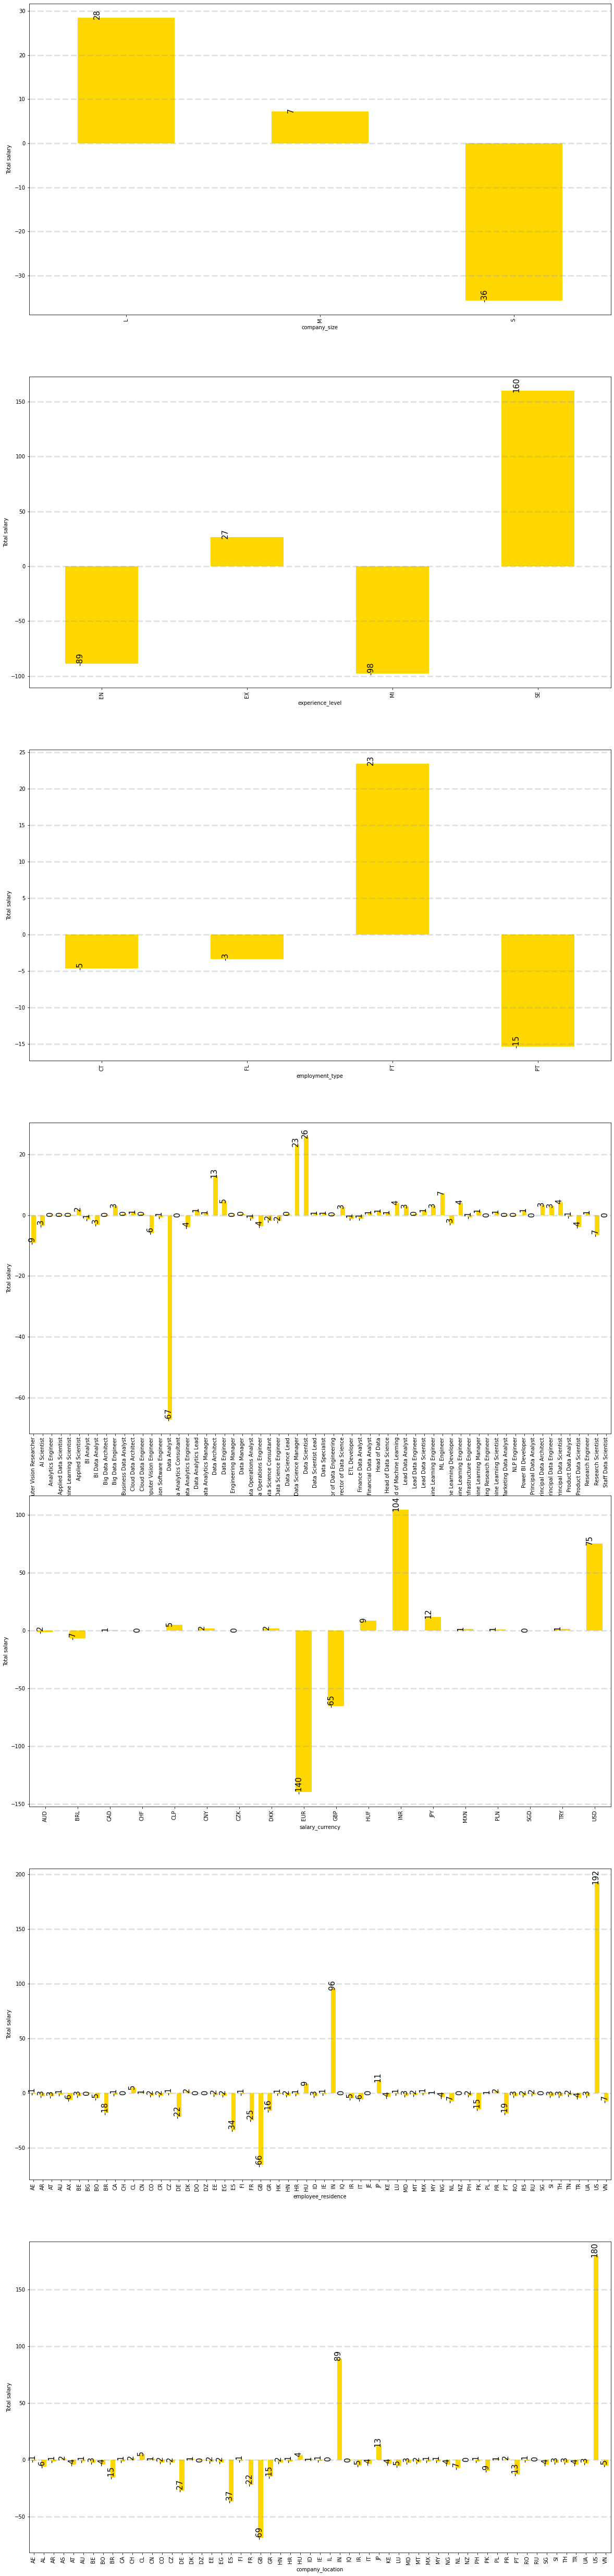

In [136]:
fig = plt.figure(figsize=(20,90))
for index,column in enumerate(categorical_features):
    plt.subplot(7,1,index+1)
    dataset=df.copy()
    dataset.groupby(feature)['salary'].sum().plot(kind='bar', color='gold')
    feature = df[column]
    ax=fig.gca()
    plt.ylabel('Total salary')
 
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.3)
    for p in ax.patches:
        ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/5,p.get_height()),ha='center',size= 15, rotation=90)

In [139]:
from sklearn.preprocessing import LabelEncoder
le_df=df.apply(LabelEncoder().fit_transform)
le_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2,2,2,47,199,17,359,62,0,57,1
1,2,2,2,47,116,17,243,62,0,57,1
2,2,2,2,30,179,17,336,62,2,57,1
3,2,2,2,30,138,17,276,62,2,57,1
4,2,2,2,30,109,17,232,62,2,57,1
...,...,...,...,...,...,...,...,...,...,...,...
1327,0,3,2,30,399,17,569,62,2,57,0
1328,1,2,2,58,251,17,417,62,2,57,0
1329,0,0,2,30,147,17,290,62,2,57,2
1330,0,0,0,10,138,17,276,62,2,57,0


In [141]:
df.groupby('company_size').count()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
company_size,,,,,,,,,,
L,322,322,322,322,322,322,322,322,322,322
M,898,898,898,898,898,898,898,898,898,898
S,112,112,112,112,112,112,112,112,112,112


In [142]:
le_df.groupby('company_size').count()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
company_size,,,,,,,,,,
0,322,322,322,322,322,322,322,322,322,322
1,898,898,898,898,898,898,898,898,898,898
2,112,112,112,112,112,112,112,112,112,112


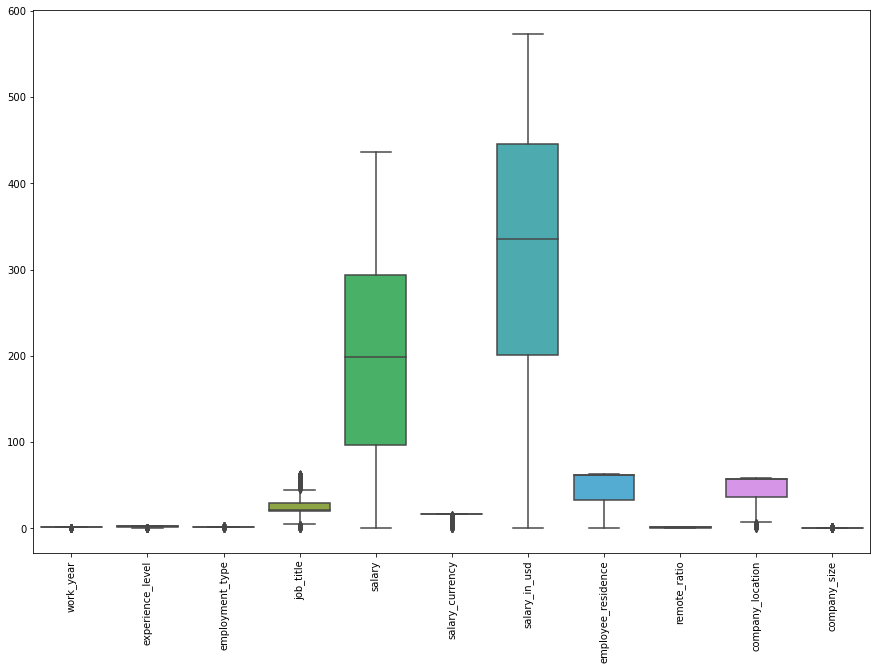

In [143]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(data=le_df)
plt.show()

In [150]:
import scipy.stats as stats

def plotvariable(df, variable):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[variable].hist(bins=30)
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist='norm',plot=plt)
    plt.show()

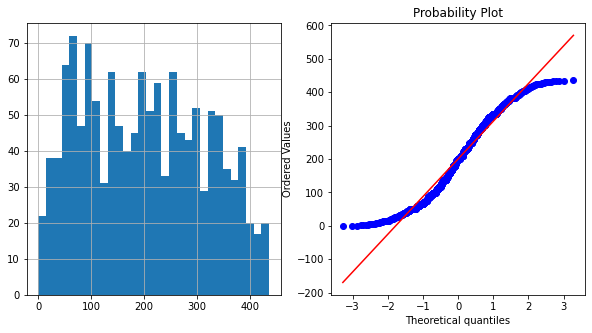

In [151]:
plotvariable(le_df, 'salary')

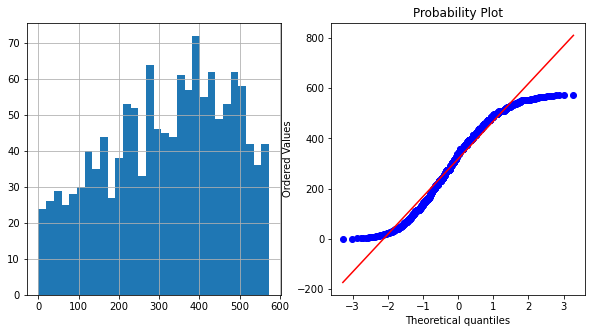

In [159]:
plotvariable(le_df, 'salary_in_usd')

In [283]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [284]:
X=le_df.iloc[:,2:]
y=le_df.iloc[:,1]

In [394]:
fs= SelectKBest(score_func=f_regression, k='all')
fs.fit(X,y)

SelectKBest(k='all', score_func=<function f_regression at 0x7fd293b984c0>)

In [395]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

employment_type : 0.53%
job_title : 0.01%
salary : 17.47%
salary_currency : 19.61%
salary_in_usd : 0.86%
employee_residence : 28.75%
remote_ratio : 1.68%
company_location : 30.84%
company_size : 0.26%


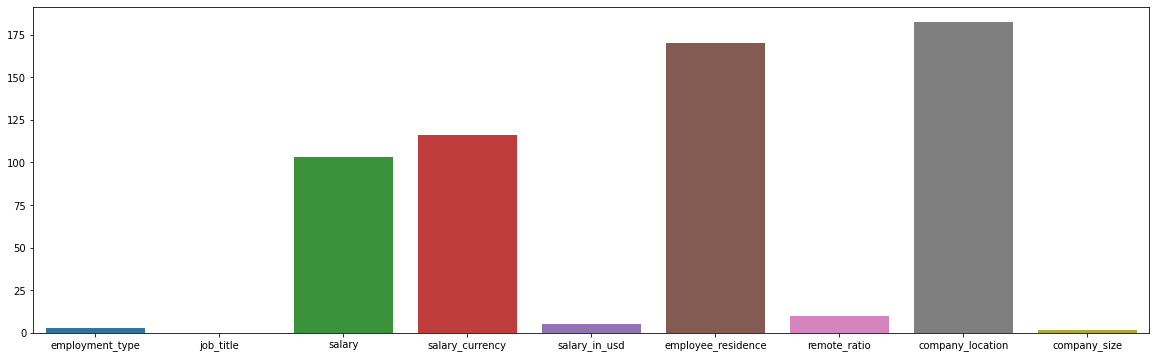

In [396]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(20,6))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

In [397]:
#consider dropping weak variables like job_title, company_size, and employment_type
le_df.drop('job_title', inplace=True, axis=1)
le_df.drop('company_size', inplace=True, axis=1)
le_df.drop('employment_type', inplace=True, axis=1)
le_df.drop('salary_in_usd', inplace=True, axis=1)
print(le_df)

KeyError: "['job_title'] not found in axis"

In [398]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [399]:
remove_outliers(le_df,le_df,3)
print(le_df)

Working on column: work_year
Working on column: experience_level
Working on column: salary
Working on column: salary_currency
Working on column: salary_in_usd
Working on column: employee_residence
Working on column: remote_ratio
Working on column: company_location
      work_year  experience_level  salary  salary_currency  salary_in_usd  \
0             2                 2   199.0               17       3.001127   
1             2                 2   116.0               17       3.001127   
2             2                 2   179.0               17       3.001127   
3             2                 2   138.0               17       3.001127   
4             2                 2   109.0               17       3.001127   
...         ...               ...     ...              ...            ...   
1327          0                 3   399.0               17       3.001127   
1328          1                 2   251.0               17       3.001127   
1329          0                 0   147.0 

In [400]:
from sklearn.model_selection import train_test_split

In [401]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [402]:
from sklearn.preprocessing import StandardScaler

In [403]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [404]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [405]:
model_comp={}

In [406]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print(f'Model R-square: {r2_score(y_test,y_pred)*100:.2f}%')
print(f'Model MSE: {mean_squared_error(y_test,y_pred)*100:.2f}%')

accuracies=cross_val_score(estimator=model, X= X_train, y= y_train,cv=5)
print('Cross Val Accuracy: {:.2f}%'.format(accuracies.std()*100))
model_comp['Linear Regression']=[r2_score(y_test,y_pred), mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-square: 11.40%
Model MSE: 84.02%
Cross Val Accuracy: 6.81%


In [407]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       experience_level   R-squared (uncentered):                   0.024
Model:                            OLS   Adj. R-squared (uncentered):              0.016
Method:                 Least Squares   F-statistic:                              2.865
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                     0.00241
Time:                        18:07:35   Log-Likelihood:                         -2492.2
No. Observations:                1065   AIC:                                      5002.
Df Residuals:                    1056   BIC:                                      5047.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0688      0.078     -0.885      0.376      -0.221       0.084
x2             0.0181      0.079      0.229      0.819      -0.137       0.173
x3             0.1379      0.086      1.610      0.108      -0.030       0.306
x4            -0.0151      0.128     -0.118      0.906      -0.266       0.235
x5             0.0383      0.078      0.491      0.624      -0.115       0.191
x6             0.1033      0.199      0.518      0.604      -0.288       0.494
x7            -0.0916      0.078     -1.179      0.239      -0.244       0.061
x8             0.1977      0.210      0.942      0.346      -0.214       0.609
x9             0.0671      0.078      0.858      0.391      -0.086       0.221
==============================================================================
Omnibus:                      223.991   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.227
Skew:                          -1.341   Prob(JB):                     3.68e-84
Kurtosis:                       4.209   Cond. No.                         6.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [408]:
residuals= lin_reg.resid
fitted_value=lin_reg.fittedvalues

In [409]:
np.mean(residuals)

2.3464788732394393

/Users/desgi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


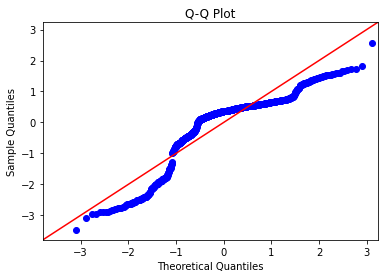

In [410]:
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

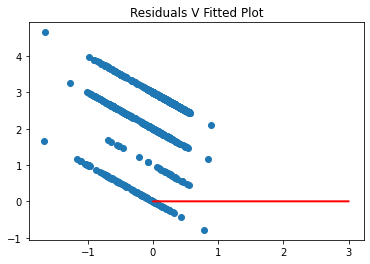

In [411]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals V Fitted Plot')
plt.show()

In [412]:
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred=model.predict((poly_reg.fit_transform(X_test)))

print(f'Model R-square: {r2_score(y_test,y_pred)*100:.2f}%')
print(f'Model MSE: {mean_squared_error(y_test,y_pred)*100:.2f}%')

accuracies=cross_val_score(estimator=model, X= X_train, y= y_train,cv=5)
print('Cross Val Accuracy: {:.2f}%'.format(accuracies.std()*100))
model_comp['Polynomial Regression']=[r2_score(y_test,y_pred), mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-square: -12.46%
Model MSE: 106.65%
Cross Val Accuracy: 6.81%


In [413]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comp['Decision Tree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 2.26%
Model MSE : 92.69%
Cross Val Accuracy: -1.37 %
Cross Val Standard Deviation: 8.29 %


In [414]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comp['Random forest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 26.25%
Model MSE : 69.94%
Cross Val Accuracy: 26.10 %
Cross Val Standard Deviation: 4.03 %


In [415]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comp['Bagging Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 29.85%
Model MSE : 66.52%
Cross Val Accuracy: 32.73 %
Cross Val Standard Deviation: 3.75 %


In [416]:
estimators=[('linear regression',LinearRegression()),('Decision Tree',DecisionTreeRegressor()),('random forest',RandomForestRegressor(n_estimators=10,random_state=0)),('bagging',BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0))]


In [417]:
model=StackingRegressor(estimators=estimators,final_estimator=LinearRegression(),passthrough=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comp['Stacking Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 34.01%
Model MSE : 62.58%
Cross Val Accuracy: 31.59 %
Cross Val Standard Deviation: 3.75 %


In [418]:
Model_com_df=pd.DataFrame(model_comp).T
Model_com_df.columns=['R-Square','MSE','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='RdYlBu_r')

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,34.01%,62.58%,31.59%,3.75%
Bagging Regressor,29.85%,66.52%,32.73%,3.75%
Random forest Regression,26.25%,69.94%,26.10%,4.03%
Linear Regression,11.40%,84.02%,11.18%,6.81%
Decision Tree Regression,2.26%,92.69%,-1.37%,8.29%
Polynomial Regression,-12.46%,106.65%,11.18%,6.81%


In [419]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")


,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,34.01%,62.58%,31.59%,3.75%
Bagging Regressor,29.85%,66.52%,32.73%,3.75%
Random forest Regression,26.25%,69.94%,26.10%,4.03%
Linear Regression,11.40%,84.02%,11.18%,6.81%
Decision Tree Regression,2.26%,92.69%,-1.37%,8.29%
Polynomial Regression,-12.46%,106.65%,11.18%,6.81%


In [420]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,34.01%,62.58%,31.59%,3.75%
Bagging Regressor,29.85%,66.52%,32.73%,3.75%
Random forest Regression,26.25%,69.94%,26.10%,4.03%
Linear Regression,11.40%,84.02%,11.18%,6.81%
Decision Tree Regression,2.26%,92.69%,-1.37%,8.29%
Polynomial Regression,-12.46%,106.65%,11.18%,6.81%
